In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Load

In [2]:
# url = "https://covid19br.s3-sa-east-1.amazonaws.com/a3d153fe0e95aa7e0d3a585c317a1dc6_HIST_PAINEL_COVIDBR_20mai2020.xlsx"
url = "https://covid19br.s3-sa-east-1.amazonaws.com/9013849cb451712f1121ef2cdee98587_HIST_PAINEL_COVIDBR_22mai2020.xlsx"
dtype = {
    "coduf": "Int64",
    "codmun": "Int64",
    "codRegiaoSaude": "Int64",
    "semanaEpi": "Int64",
    "populacaoTCU2019": "Int64",
    "casosAcumulado": "Int64",
    "obitosAcumulado": "Int64",
    "Recuperadosnovos": "Int64",
    "emAcompanhamentoNovos": "Int64",
}
df = pd.read_excel(url, dtype=dtype)
df["data"] = pd.to_datetime(df["data"], format="%Y-%m-%d")
df["coduf"] = df["coduf"].astype("Int64")

# Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   regiao                 103202 non-null  object        
 1   estado                 103115 non-null  object        
 2   municipio              10692 non-null   object        
 3   coduf                  103202 non-null  Int64         
 4   codmun                 101219 non-null  Int64         
 5   codRegiaoSaude         10692 non-null   Int64         
 6   nomeRegiaoSaude        10692 non-null   object        
 7   data                   103202 non-null  datetime64[ns]
 8   semanaEpi              103202 non-null  Int64         
 9   populacaoTCU2019       12675 non-null   Int64         
 10  casosAcumulado         103202 non-null  Int64         
 11  obitosAcumulado        103202 non-null  Int64         
 12  Recuperadosnovos       34 non-null      Int6

# Counts

## Regiao

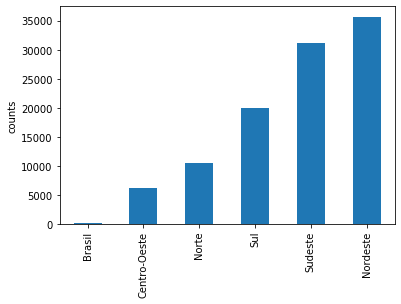

In [4]:
axes = df["regiao"].value_counts().sort_values().plot(kind="bar")
axes.set_ylabel("counts");

## Estado

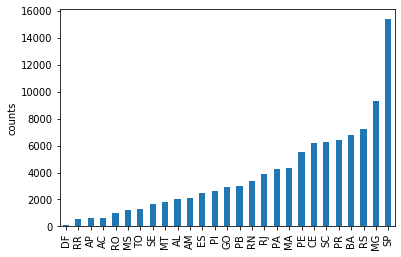

In [5]:
axes = df["estado"].value_counts().sort_values().plot(kind="bar")
axes.set_ylabel("counts");

# Estado vs codigo

In [6]:
df[["estado", "coduf"]].drop_duplicates().sort_values(by=["estado", "coduf"])

,estado,coduf
151,AC,12
943,AL,27
216,AM,13
412,AP,16
1088,BA,29
668,CE,23
1906,DF,53
1242,ES,32
1835,GO,52
541,MA,21


# Missing rate

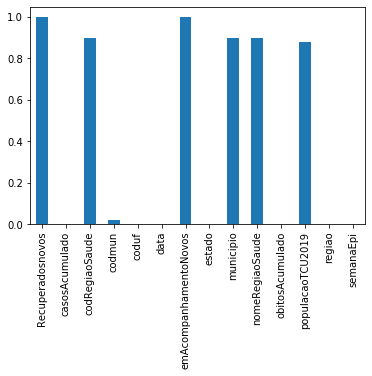

In [7]:
df.apply(lambda x: sum(pd.isna(x))/len(x), axis=0).sort_index().plot(kind="bar");

# Casos acumulados

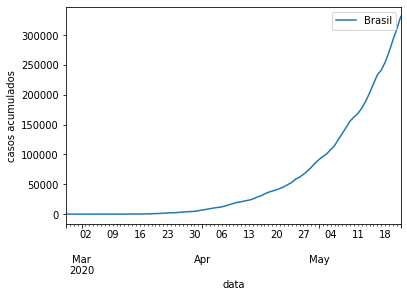

In [8]:
ax = df[df["regiao"] == "Brasil"][["data", "casosAcumulado"]].\
    rename(columns={"casosAcumulado": "Brasil"}).set_index("data").plot()
ax.set_ylabel("casos acumulados");

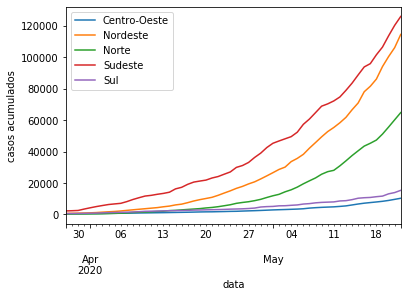

In [9]:
ax = plt.subplot()
regioes = df[(df["regiao"] != "Brasil")]["regiao"].unique()
for regiao in sorted(regioes):
    df[(df["regiao"] == regiao)].groupby(["data", "estado", "codmun"]).\
        sum()[["casosAcumulado"]].groupby(level=0).\
        sum().rename(columns={"casosAcumulado": regiao}).plot(ax=ax)
ax.set_ylabel("casos acumulados");